In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("Churn_Modelling.csv")

In [ ]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
# prompt: labe encoding syntes
le = LabelEncoder()
data['Geography'] = le.fit_transform(data['Geography'])
data['Gender'] = le.fit_transform(data['Gender'])
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


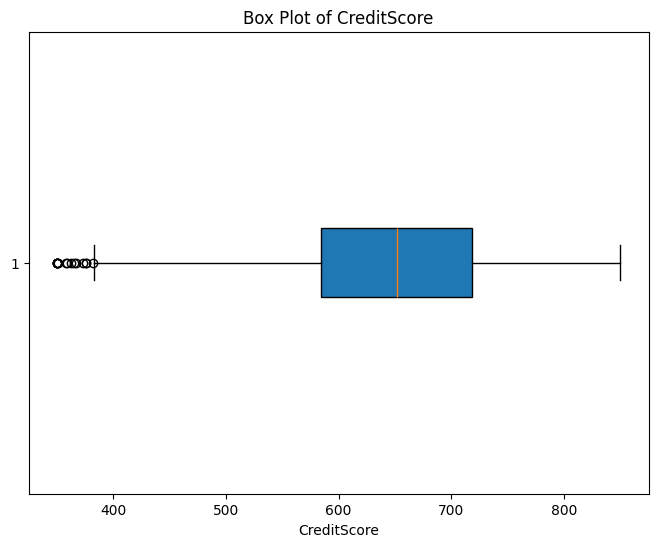

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.boxplot(data['CreditScore'], vert=False, patch_artist=True)  # Create the box plot
plt.title('Box Plot of CreditScore')
plt.xlabel('CreditScore')
plt.show()

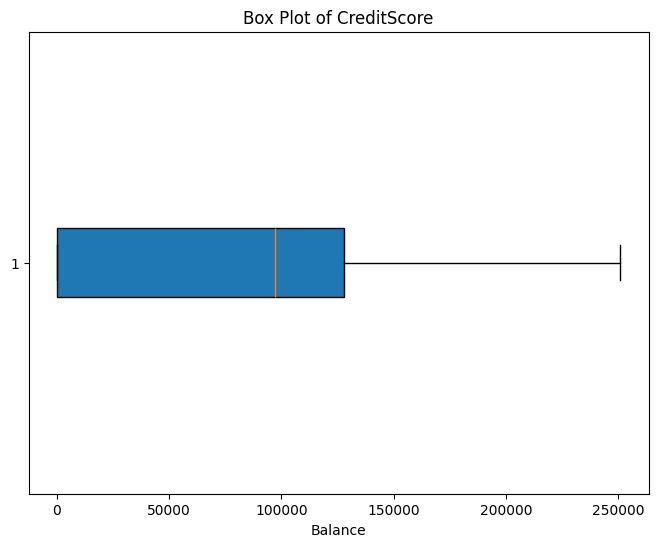

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.boxplot(data['Balance'], vert=False, patch_artist=True)  # Create the box plot
plt.title('Box Plot of CreditScore')
plt.xlabel('Balance')
plt.show()

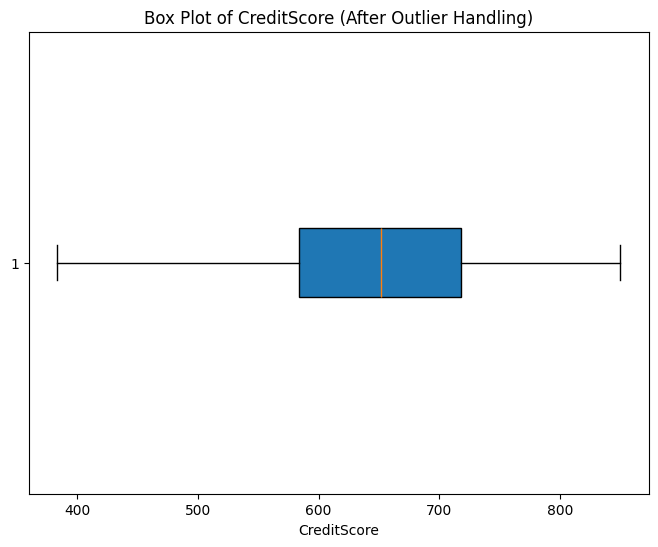

In [ ]:
# Handling outliers using IQR method for 'CreditScore'
Q1_credit = data['CreditScore'].quantile(0.25)
Q3_credit = data['CreditScore'].quantile(0.75)
IQR_credit = Q3_credit - Q1_credit
lower_bound_credit = Q1_credit - 1.5 * IQR_credit
upper_bound_credit = Q3_credit + 1.5 * IQR_credit

# Replace outliers with the bounds (or remove them)
data['CreditScore'] = np.where(data['CreditScore'] < lower_bound_credit, lower_bound_credit, data['CreditScore'])
data['CreditScore'] = np.where(data['CreditScore'] > upper_bound_credit, upper_bound_credit, data['CreditScore'])




# Visualize the data after outlier handling (optional)
plt.figure(figsize=(8, 6))
plt.boxplot(data['CreditScore'], vert=False, patch_artist=True)
plt.title('Box Plot of CreditScore (After Outlier Handling)')
plt.xlabel('CreditScore')
plt.show()


In [ ]:
scaler = StandardScaler()
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [ ]:
data = data.drop(columns=['Surname', 'RowNumber', 'CustomerId'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  float64
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  float64
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  float64
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 859.5 KB


In [ ]:
data.shape

(10000, 11)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as SGD
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [ ]:
# Convert object columns (if any) to numeric representations
for col in data.select_dtypes(include=['object']).columns:
    # Use appropriate encoding methods like one-hot encoding or label encoding
    if data[col].nunique() <= 5:  # Example threshold for label encoding
        data[col] = LabelEncoder().fit_transform(data[col])
    #else:
        # Handle one-hot encoding for high cardinality categorical features



In [ ]:
tensor_data = torch.tensor(data.values, dtype=torch.float32)

print(tensor_data.shape)

torch.Size([10000, 11])


In [ ]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        # Change the input size of the first layer to 10 to match the number of features in X_train
        self.fc1 = nn.Linear(10, 20)
        self.fc2 = nn.Linear(20, 16)
        self.fc3 = nn.Linear(16, 4)
        self.out = nn.Linear(4, 1)
        self.dropout = nn.Dropout(0.3)  # Add dropout layer
    def forward(self, x):
      x = F.relu(self.fc1(x))
      x = self.dropout(x)
      x = F.relu(self.fc2(x))
      x = self.dropout(x)
      x = F.relu(self.fc3(x))
      x = self.out(x)
      return x

In [ ]:

# Pick a manual seed for randomization
torch.manual_seed(41)
# Create an instance of model
model = Model()

In [ ]:

# Train Test Split!  Set X, y
X = data.drop("Exited", axis=1)
y = data['Exited']

In [ ]:
X = X.values
y = y.values

In [ ]:
from sklearn.model_selection import train_test_split
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [ ]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [ ]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:

# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [ ]:
# Train our model!
# Epochs? (one run thru all the training data in our network)
epochs = 150
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Apply sigmoid activation to get probabilities for binary classification
  y_pred = torch.sigmoid(y_pred)

  # Reshape y_train to match y_pred dimensions if necessary
  y_train = y_train.view(-1, 1).float()  # Reshape to [batch_size, 1] and convert to float

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and loss: 0.6932082772254944
Epoch: 10 and loss: 0.693173348903656
Epoch: 20 and loss: 0.693191647529602
Epoch: 30 and loss: 0.6931466460227966
Epoch: 40 and loss: 0.6931536197662354
Epoch: 50 and loss: 0.6931917071342468
Epoch: 60 and loss: 0.6931601762771606
Epoch: 70 and loss: 0.6931429505348206
Epoch: 80 and loss: 0.6931714415550232
Epoch: 90 and loss: 0.6931582093238831
Epoch: 100 and loss: 0.6931759119033813
Epoch: 110 and loss: 0.6932002305984497
Epoch: 120 and loss: 0.6931577324867249
Epoch: 130 and loss: 0.693123996257782
Epoch: 140 and loss: 0.6931480765342712


In [ ]:
# 5. Evaluate the Model
with torch.no_grad():
    y_test_pred = model(X_test)  # Get predicted probabilities for each class

    # Get the predicted class by selecting the index of the highest probability
    _, predicted = torch.max(y_test_pred, 1)

    # Now compare the predicted class with the true labels
    accuracy = (predicted == y_test).float().mean()
    print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.7985
